# Loan Default Prediction

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Dataset

In [2]:
#Load dataset
datafile = os.path.join('MortgageDefault_Raw.csv')
df = pd.read_csv(datafile,header = 0)
df.head()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default,State
0,644,22,6,3450,2008,0,MA
1,712,19,2,6520,2008,0,NY
2,717,24,5,5815,2008,0,DC
3,751,17,5,6366,2008,0,NC
4,753,16,7,1779,2008,0,GA


# Visualize, Analyze

In [3]:
df.describe()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,699.855190,19.956960,5.003680,5007.641470,2005.300000,0.006080
std,50.086814,7.636061,2.008593,1987.042083,2.609611,0.077737
min,470.000000,0.000000,0.000000,0.000000,2001.000000,0.000000
25%,666.000000,15.000000,4.000000,3659.000000,2003.000000,0.000000
50%,700.000000,20.000000,5.000000,5003.000000,2005.500000,0.000000
75%,734.000000,25.000000,6.000000,6362.000000,2008.000000,0.000000
max,925.000000,40.000000,14.000000,14094.000000,2009.000000,1.000000


In [4]:
dataset        = df.values

In [5]:
X = dataset[:,:5]
Y = dataset[:,5]
defaulters     = np.where(Y == 1)
non_defaulters = np.where(Y == 0)

print('Number of     defaulters: ', len(defaulters[0]))
print('Number of non defaulters: ', len(non_defaulters[0]))

Number of     defaulters:  608
Number of non defaulters:  99392


# Train model

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)


model     = LogisticRegression()
model     = model.fit(X_train, Y_train.astype(np.int32))


# Accuracy

In [7]:
train_acc = model.score(X_train, Y_train.astype(np.int32))
test_acc  = model.score(X_test, Y_test.astype(np.int32))

print('Training accuracy is ', 100*train_acc, '%')
print('Test     accuracy is ', 100*test_acc, '%')

Training accuracy is  99.3826666667 %
Test     accuracy is  99.444 %


# Visualize Results

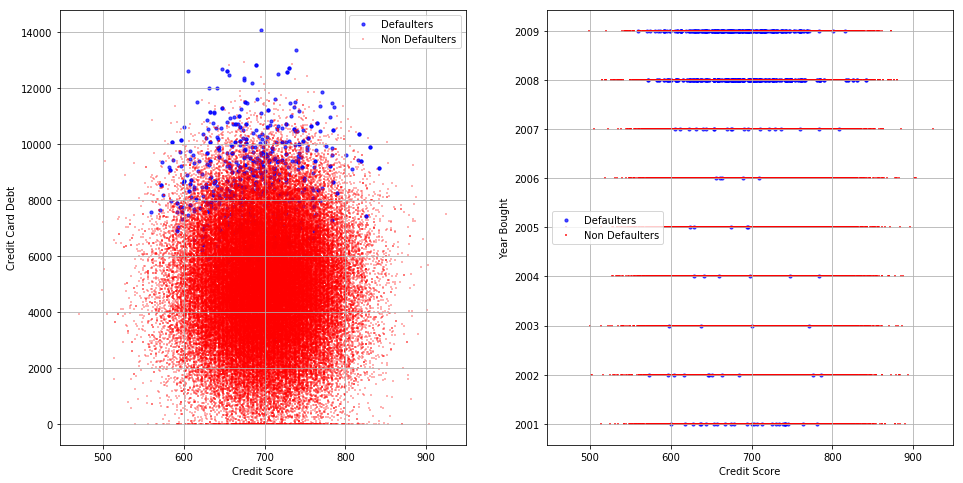

In [8]:
# 0 label='Credit Score',     
# 1 label='House Age',        
# 2 label='Years Employed',   
# 3 label='Credit Card Debt', 
# 4 label='Year Bought',      

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(X[defaulters, 0],     X[defaulters, 3],     marker='o', c='b', alpha=0.7, s=10)
plt.scatter(X[non_defaulters, 0], X[non_defaulters, 3], marker='+', c='r', alpha=0.3, s=5)
plt.xlabel('Credit Score')
plt.ylabel('Credit Card Debt')
plt.legend(['Defaulters', 'Non Defaulters'])
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X[defaulters, 0],     X[defaulters, 4],     marker='o', c='b', alpha=0.7, s=10)
plt.scatter(X[non_defaulters, 0], X[non_defaulters, 4], marker='+', c='r', alpha=0.7, s=5)
plt.xlabel('Credit Score')
plt.ylabel('Year Bought')
plt.legend(['Defaulters', 'Non Defaulters'])
plt.grid()

plt.show()